### Import Data

In [81]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

from pickle import load, dump

In [82]:
data = pd.read_csv('original.csv', index_col = 'Unnamed: 0')

In [83]:
data.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 30091
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   number_of_stages              2752 non-null   float64
 7   total_proppant                19080 non-null  float64
 8   total_fluid                   19076 non-null  float64
 9   true_vertical_depth           28197 non-null  float64
 10  ffs_frac_type                 14585 non-null  object 
 11  proppant_intensity            18971 non-null  float64
 12  frac_fluid_intensity          18946 non-null  float64
 13  a

### Handling Missing Data

In [85]:
data.isnull().sum()['OilPeakRate']

10386

In [86]:
data.dropna(subset=['OilPeakRate'], inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   bh_x                          17882 non-null  float64
 3   bh_y                          17882 non-null  float64
 4   standardized_operator_name    19306 non-null  int64  
 5   gross_perforated_length       19148 non-null  float64
 6   number_of_stages              2643 non-null   float64
 7   total_proppant                17912 non-null  float64
 8   total_fluid                   17866 non-null  float64
 9   true_vertical_depth           19201 non-null  float64
 10  ffs_frac_type                 14310 non-null  object 
 11  proppant_intensity            17872 non-null  float64
 12  frac_fluid_intensity          17821 non-null  float64
 13  a

In [87]:
null_count = data.isnull().sum()
severe_missing = null_count[null_count > 200].index

In [88]:
good_col = [] 
for col in data.columns:
    if col not in severe_missing: 
        good_col.append(col)

In [89]:
correlation_matrix = data.corr()
columns_to_replace_list = [] 
for column in severe_missing:
    try:
        replaceable = []
        corr_col = correlation_matrix[column]
        for col in corr_col[corr_col.abs()>0.7].index:
            if col in good_col:
                replaceable.append(col)
        columns_to_replace = {column: replaceable}
        columns_to_replace_list.append(columns_to_replace)
    except:
        continue

In [90]:
[print(c) for c in columns_to_replace_list if len(c.values())>0]

{'bh_x': ['surface_x', 'horizontal_midpoint_x', 'horizontal_toe_x']}
{'bh_y': ['surface_y', 'horizontal_midpoint_y', 'horizontal_toe_y']}
{'number_of_stages': ['gross_perforated_length', 'bin_lateral_length']}
{'total_proppant': []}
{'total_fluid': ['gross_perforated_length', 'bin_lateral_length']}
{'proppant_intensity': []}
{'frac_fluid_intensity': []}
{'average_stage_length': []}
{'average_proppant_per_stage': []}
{'average_frac_fluid_per_stage': []}
{'proppant_to_frac_fluid_ratio': []}
{'frac_fluid_to_proppant_ratio': []}
{'frac_seasoning': []}


[None, None, None, None, None, None, None, None, None, None, None, None, None]

In [91]:
# drop columns that are highly correlated to other variables
clean_data = data.copy()

for entry in columns_to_replace_list:
    for key, value in entry.items():
        if len(value)>0:
            print(f'Dropping column {key}')
            # drop the column "key" in the clean_data
            clean_data = clean_data.drop(key, axis=1)

Dropping column bh_x
Dropping column bh_y
Dropping column number_of_stages
Dropping column total_fluid


In [92]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   standardized_operator_name    19306 non-null  int64  
 3   gross_perforated_length       19148 non-null  float64
 4   total_proppant                17912 non-null  float64
 5   true_vertical_depth           19201 non-null  float64
 6   ffs_frac_type                 14310 non-null  object 
 7   proppant_intensity            17872 non-null  float64
 8   frac_fluid_intensity          17821 non-null  float64
 9   average_stage_length          2620 non-null   float64
 10  average_proppant_per_stage    2595 non-null   float64
 11  average_frac_fluid_per_stage  2582 non-null   float64
 12  proppant_to_frac_fluid_ratio  17501 non-null  float64
 13  f

In [93]:
# fill out missing values using median

median_data = clean_data.copy()
for col in median_data.columns:
    try:
        median_data[col] = median_data[col].fillna(median_data[col].median())
    except:
        #fill the column with mode if the column is not numeric
        median_data[col] = median_data[col].fillna(median_data[col].mode()[0])

median_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   standardized_operator_name    19306 non-null  int64  
 3   gross_perforated_length       19306 non-null  float64
 4   total_proppant                19306 non-null  float64
 5   true_vertical_depth           19306 non-null  float64
 6   ffs_frac_type                 19306 non-null  object 
 7   proppant_intensity            19306 non-null  float64
 8   frac_fluid_intensity          19306 non-null  float64
 9   average_stage_length          19306 non-null  float64
 10  average_proppant_per_stage    19306 non-null  float64
 11  average_frac_fluid_per_stage  19306 non-null  float64
 12  proppant_to_frac_fluid_ratio  19306 non-null  float64
 13  f

### Encoding

In [94]:
df = median_data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   standardized_operator_name    19306 non-null  int64  
 3   gross_perforated_length       19306 non-null  float64
 4   total_proppant                19306 non-null  float64
 5   true_vertical_depth           19306 non-null  float64
 6   ffs_frac_type                 19306 non-null  object 
 7   proppant_intensity            19306 non-null  float64
 8   frac_fluid_intensity          19306 non-null  float64
 9   average_stage_length          19306 non-null  float64
 10  average_proppant_per_stage    19306 non-null  float64
 11  average_frac_fluid_per_stage  19306 non-null  float64
 12  proppant_to_frac_fluid_ratio  19306 non-null  float64
 13  f

In [95]:
X = df.drop('OilPeakRate', axis = 1)
y = df['OilPeakRate']

categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols]

,ffs_frac_type,relative_well_position,batch_frac_classification,well_family_relationship,frac_type
0,Slickwater Only,Standalone Well,Unknown,Standalone Well,Primary Frac
1,Slickwater Only,Outer Well,Unknown,Infill Child Well,Primary Frac
2,Slickwater Only,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac
3,Slickwater Only,Standalone Well,Unknown,Standalone Well,Primary Frac
4,Slickwater Only,Outer Well,Unknown,Infill Child Well,Primary Frac
...,...,...,...,...,...
29432,Slickwater Only,Standalone Well,Unknown,Standalone Well,Primary Frac
29433,Slickwater Crosslink Hybrid,Outer Well,Non-Batch Frac,Sibling Well,Primary Frac
29434,Slickwater Crosslink Hybrid,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac
29435,Crosslink Only,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac


In [96]:
X['ffs_frac_type'].unique()

array(['Slickwater Only', 'Slickwater Crosslink Hybrid', 'Undefined',
       'Crosslink Only', 'Slickwater Linear Hybrid', 'Linear Only'],
      dtype=object)

In [97]:
X['Slickwater'] = 0
X['Crosslink'] = 0
X['Linear'] = 0

X['Slickwater'] |= X['ffs_frac_type'].str.contains('Slickwater')
X['Crosslink'] |= X['ffs_frac_type'].str.contains('Crosslink')
X['Linear'] |= X['ffs_frac_type'].str.contains('Linear')

X.drop('ffs_frac_type', axis=1, inplace=True)

X['Slickwater'] = X['Slickwater'].astype(np.int8)
X['Crosslink'] = X['Crosslink'].astype(np.int8)
X['Linear'] = X['Linear'].astype(np.int8)

In [98]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   standardized_operator_name    19306 non-null  int64  
 3   gross_perforated_length       19306 non-null  float64
 4   total_proppant                19306 non-null  float64
 5   true_vertical_depth           19306 non-null  float64
 6   proppant_intensity            19306 non-null  float64
 7   frac_fluid_intensity          19306 non-null  float64
 8   average_stage_length          19306 non-null  float64
 9   average_proppant_per_stage    19306 non-null  float64
 10  average_frac_fluid_per_stage  19306 non-null  float64
 11  proppant_to_frac_fluid_ratio  19306 non-null  float64
 12  frac_fluid_to_proppant_ratio  19306 non-null  float64
 13  b

In [99]:
print(f'Unique values for relative well position:', X['relative_well_position'].unique())
print(f'Unique values for batch_frac_classification:', X['batch_frac_classification'].unique())
print(f'Unique values for well_family_relationship:', X['well_family_relationship'].unique())
print(f'Unique values for frac_type:', X['frac_type'].unique())

Unique values for relative well position: ['Standalone Well' 'Outer Well' 'Inner Well' 'Unknown']
Unique values for batch_frac_classification: ['Unknown' 'Non-Batch Frac' 'Batch-Sequential Frac'
 'Batch-Concurrent Frac']
Unique values for well_family_relationship: ['Standalone Well' 'Infill Child Well' 'Sibling Well' 'Unknown']
Unique values for frac_type: ['Primary Frac']


In [100]:
X = X.drop('frac_type', axis = 1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19306 entries, 0 to 29436
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     19306 non-null  float64
 1   surface_y                     19306 non-null  float64
 2   standardized_operator_name    19306 non-null  int64  
 3   gross_perforated_length       19306 non-null  float64
 4   total_proppant                19306 non-null  float64
 5   true_vertical_depth           19306 non-null  float64
 6   proppant_intensity            19306 non-null  float64
 7   frac_fluid_intensity          19306 non-null  float64
 8   average_stage_length          19306 non-null  float64
 9   average_proppant_per_stage    19306 non-null  float64
 10  average_frac_fluid_per_stage  19306 non-null  float64
 11  proppant_to_frac_fluid_ratio  19306 non-null  float64
 12  frac_fluid_to_proppant_ratio  19306 non-null  float64
 13  b

In [101]:
def encode_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object', 'category']).columns
    encoder = OneHotEncoder(sparse=False)
    encoded_data = encoder.fit_transform(df[categorical_columns])
    with open('onehot_encoder.pkl', 'wb') as f:
        dump(encoder, f)
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))
    return pd.concat([X.drop(categorical_columns, axis=1), encoded_df], axis=1)


# Usage
X_encoded = encode_categorical_columns(X)

C:\Users\Codex985\AppData\Roaming\Python\Python39\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [102]:
X_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25204 entries, 0 to 29436
Data columns (total 35 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   surface_x                                        19306 non-null  float64
 1   surface_y                                        19306 non-null  float64
 2   standardized_operator_name                       19306 non-null  float64
 3   gross_perforated_length                          19306 non-null  float64
 4   total_proppant                                   19306 non-null  float64
 5   true_vertical_depth                              19306 non-null  float64
 6   proppant_intensity                               19306 non-null  float64
 7   frac_fluid_intensity                             19306 non-null  float64
 8   average_stage_length                             19306 non-null  float64
 9   average_proppant_per_stage  

In [103]:
data_encoded = pd.concat([X_encoded, y], axis =1)
data_encoded.dropna(inplace = True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13408 entries, 0 to 19305
Data columns (total 36 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   surface_x                                        13408 non-null  float64
 1   surface_y                                        13408 non-null  float64
 2   standardized_operator_name                       13408 non-null  float64
 3   gross_perforated_length                          13408 non-null  float64
 4   total_proppant                                   13408 non-null  float64
 5   true_vertical_depth                              13408 non-null  float64
 6   proppant_intensity                               13408 non-null  float64
 7   frac_fluid_intensity                             13408 non-null  float64
 8   average_stage_length                             13408 non-null  float64
 9   average_proppant_per_stage  

In [104]:
unknown_cols = [c for c in data_encoded.columns if 'Unknown' in c]
print(unknown_cols)

data_encoded.drop(unknown_cols, axis =1, inplace=True)
data_encoded.info()

['relative_well_position_Unknown', 'batch_frac_classification_Unknown', 'well_family_relationship_Unknown']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13408 entries, 0 to 19305
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   surface_x                                        13408 non-null  float64
 1   surface_y                                        13408 non-null  float64
 2   standardized_operator_name                       13408 non-null  float64
 3   gross_perforated_length                          13408 non-null  float64
 4   total_proppant                                   13408 non-null  float64
 5   true_vertical_depth                              13408 non-null  float64
 6   proppant_intensity                               13408 non-null  float64
 7   frac_fluid_intensity                             13408 non-null  float64
 8 

In [105]:
data_encoded.replace([np.inf, -np.inf], np.nan, inplace = True)
data_encoded.dropna(inplace = True)
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13407 entries, 0 to 19305
Data columns (total 33 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   surface_x                                        13407 non-null  float64
 1   surface_y                                        13407 non-null  float64
 2   standardized_operator_name                       13407 non-null  float64
 3   gross_perforated_length                          13407 non-null  float64
 4   total_proppant                                   13407 non-null  float64
 5   true_vertical_depth                              13407 non-null  float64
 6   proppant_intensity                               13407 non-null  float64
 7   frac_fluid_intensity                             13407 non-null  float64
 8   average_stage_length                             13407 non-null  float64
 9   average_proppant_per_stage  

### Feature Engineering

In [106]:
X = data_encoded.drop('OilPeakRate', axis = 1)
y = data_encoded['OilPeakRate']

In [107]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_X = std_scaler.fit_transform(X) 

with open('preprocess/std_scaler.pkl', 'wb') as f:
    dump(std_scaler, f)

scaled_X_df = pd.DataFrame(scaled_X, columns = X_train.columns)  

scaled_X_df  

,surface_x,surface_y,standardized_operator_name,gross_perforated_length,total_proppant,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,...,Linear,relative_well_position_Inner Well,relative_well_position_Outer Well,relative_well_position_Standalone Well,batch_frac_classification_Batch-Concurrent Frac,batch_frac_classification_Batch-Sequential Frac,batch_frac_classification_Non-Batch Frac,well_family_relationship_Infill Child Well,well_family_relationship_Sibling Well,well_family_relationship_Standalone Well
0,2.022964,-1.003206,-0.333329,-0.961037,-1.371532,0.056698,-1.657749,0.155848,-0.108345,0.003284,...,-0.436058,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,-0.757846,-0.496688,-0.760898,1.182173
1,2.001733,-1.019231,-1.234961,-1.301702,-1.288443,0.013783,-1.338697,-1.293116,-0.108345,0.003284,...,-0.436058,-0.572211,1.464823,-0.845900,-0.549227,-0.420569,-0.757846,2.013337,-0.760898,-0.845900
2,1.998847,-1.001680,1.333323,-1.027717,-0.898663,0.101609,-0.565503,-0.377873,2.140283,0.692996,...,-0.436058,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,1.319529,-0.496688,-0.760898,1.182173
3,2.023461,-1.034850,-1.234961,-1.065331,-1.302189,0.017775,-1.472008,-1.509685,2.696855,-3.694811,...,-0.436058,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,-0.757846,-0.496688,-0.760898,1.182173
4,1.992421,-1.046739,-1.234961,-1.027289,-1.288915,0.032247,-1.454638,-1.340979,-0.108345,0.003284,...,-0.436058,-0.572211,1.464823,-0.845900,-0.549227,-0.420569,-0.757846,2.013337,-0.760898,-0.845900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13402,-0.583928,0.917246,1.041887,1.721973,0.784611,0.249815,-0.040208,1.063142,-0.108345,0.003284,...,2.293274,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,-0.757846,-0.496688,-0.760898,1.182173
13403,-0.522530,0.908355,-0.023678,1.412510,1.569947,0.311193,0.833153,1.231964,-0.108345,0.003284,...,-0.436058,-0.572211,1.464823,-0.845900,-0.549227,-0.420569,1.319529,-0.496688,1.314236,-0.845900
13404,-0.128178,0.639798,-1.207638,0.917113,0.733125,0.506805,0.351139,1.431766,-2.208752,-0.892318,...,2.293274,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,1.319529,-0.496688,-0.760898,1.182173
13405,-0.128107,0.639858,-1.207638,1.096635,1.352624,0.243827,0.855842,0.847712,-1.569751,1.444763,...,2.293274,-0.572211,-0.682676,1.182173,-0.549227,-0.420569,1.319529,-0.496688,-0.760898,1.182173


In [108]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

principalComponents = pca.fit_transform(scaled_X_df)

with open('pca.pkl', 'wb') as f:
    dump(pca, f)

per_var = np.round(pca.explained_variance_ratio_*100, 1)    
print(per_var)

[16.8 12.   8.8  8.1  4.9  4.5  4.4  4.   3.7  3.4  3.4  3.2  3.1  3.1
  2.8  2.7  2.6  2.2  1.7  1.6  0.9  0.9  0.6  0.2  0.2  0.1  0.   0.
  0.   0.   0.   0. ]


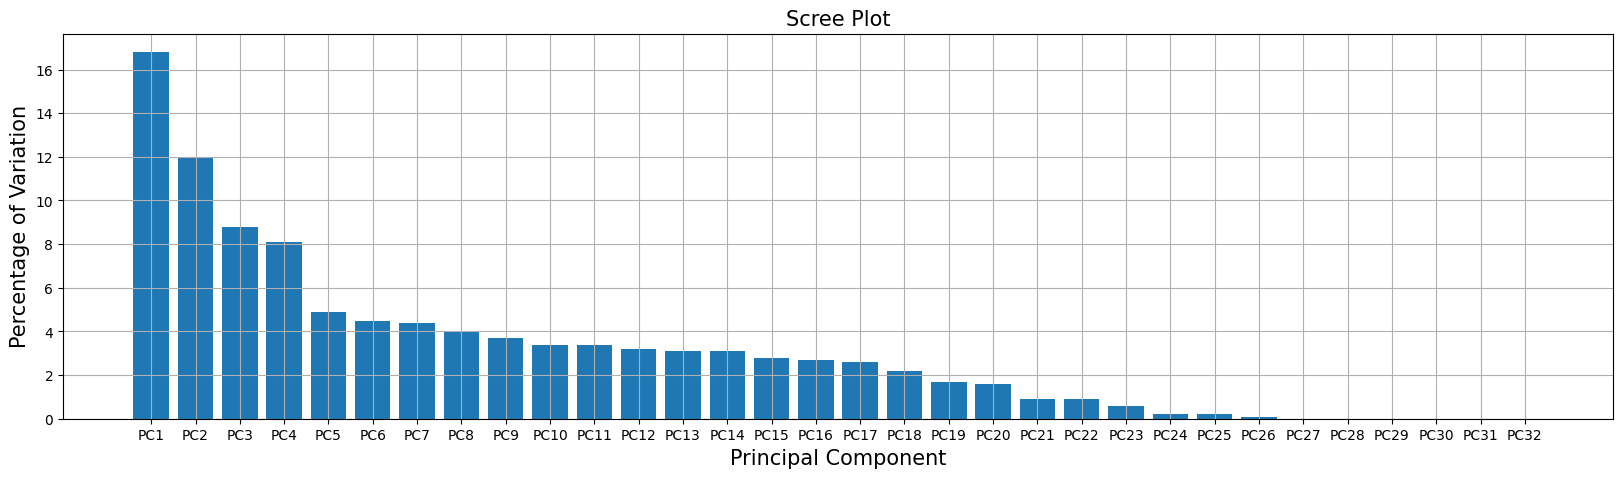

In [109]:
plt.figure(figsize = (20,5))

princ_comp = ["PC" + str(x) for x in range(1, 33)]

plt.bar(x = range(1, 33), height = per_var, tick_label = princ_comp)
plt.xlabel("Principal Component", fontsize = 15)
plt.ylabel("Percentage of Variation", fontsize = 15)
plt.title("Scree Plot", fontsize = 15)
plt.grid();

In [110]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of PCs for 99% variance
num_components_99_percent = np.argmax(cumulative_variance > 0.99) + 1

print(f"Number of PCs for 99% variance: {num_components_99_percent}")

Number of PCs for 99% variance: 23


In [111]:
pca = PCA(n_components=23)
principal_components = pca.fit_transform(X)

with open('pca.pkl', 'wb') as f:
    dump(pca, f)

# Create a DataFrame with the principal components
columns = [f'PC{i}' for i in range(1, num_components_99_percent + 1)]
pc_df = pd.DataFrame(data=principal_components, columns=columns)

data_concat = pd.concat([pc_df, y], axis =1)

# Save the DataFrame to a new CSV file
# data_concat.to_csv('principal_components_data.csv', index=False)

data_concat.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,OilPeakRate
0,-850422.729878,-288827.792180,430556.380183,3828.908810,-3283.562097,810.281516,6250.256396,618.021594,169.527715,-679.199811,...,-19.322011,-7.364234,-32.752107,-5.248975,0.052622,0.486759,0.091273,-0.475904,-0.285871,46.623023
1,-842605.253310,-251709.819227,424304.129043,3557.710716,-3003.262263,690.733312,352.769865,639.615558,128.141436,-620.354008,...,-5.548343,-9.325422,-17.785963,-0.609351,-0.056595,-0.795394,-0.144172,0.881240,-0.582434,59.750009
2,-761848.697855,-97555.983426,425822.193237,27528.757566,-3990.784068,542.701055,376.196100,-621.932903,111.740399,-277.538017,...,52.452023,76.188497,4.383547,-0.897086,-0.139005,0.955486,-0.038597,-0.100317,-0.337726,10.785716
3,-854503.919326,-253622.913796,428555.957932,-67544.444133,-580.945490,1912.310705,3065.668082,-1934.122304,-466.784619,-997.991779,...,-3.520334,79.380069,-8.803529,-1.784467,-0.347291,0.623013,0.066943,-0.432782,-0.526856,123.797638
4,-850125.461995,-248521.673891,422350.152484,3673.524735,1956.277269,-1873.286024,5144.924946,648.121781,-205.256847,-525.683990,...,-4.155955,-8.876663,-17.064022,0.012265,-0.150113,-0.843604,-0.122297,0.862112,-0.556753,102.309540


In [112]:
data_concat.to_csv('principal_components_data.csv', index=False)

In [113]:
print(X.columns)

Index(['surface_x', 'surface_y', 'standardized_operator_name',
       'gross_perforated_length', 'total_proppant', 'true_vertical_depth',
       'proppant_intensity', 'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'pad_id', 'frac_seasoning',
       'horizontal_midpoint_x', 'horizontal_midpoint_y', 'horizontal_toe_x',
       'horizontal_toe_y', 'Slickwater', 'Crosslink', 'Linear',
       'relative_well_position_Inner Well',
       'relative_well_position_Outer Well',
       'relative_well_position_Standalone Well',
       'batch_frac_classification_Batch-Concurrent Frac',
       'batch_frac_classification_Batch-Sequential Frac',
       'batch_frac_classification_Non-Batch Frac',
       'well_family_relationship_Infill Child Well',
       'well_family_relationship_Sibling Well',
       'well_family_relationship_Standalon

In [114]:
indx = np.argsort(np.absolute(pca.components_).sum(axis = 0))
X_ori = df_scaled_data.drop('OilPeakRate', axis = 1)
X_ori.columns[indx][-6:-1]

Index(['surface_x', 'surface_y', 'horizontal_midpoint_x', 'horizontal_toe_x',
       'horizontal_toe_y'],
      dtype='object')

In [115]:
for i in range(5):
    col_name = f'PC{i}'
    pci_weights = np.absolute(pca.components_[i,:])
    idx = np.argmax(pci_weights)
    best_f = X_ori.columns[idx]
    print(f"Feature {best_f} is the most contributer for PC{i+1} ")

Feature surface_y is the most contributer for PC1 
Feature total_proppant is the most contributer for PC2 
Feature horizontal_toe_x is the most contributer for PC3 
Feature average_frac_fluid_per_stage is the most contributer for PC4 
Feature surface_y is the most contributer for PC5 


In [116]:
transformation_matrix = pca.components_.T

In [117]:
X = data_concat.drop('OilPeakRate', axis = 1)
y = data_concat['OilPeakRate']

### Gradient Boosting